## 2.1 Reading passwords from a file
You are now going to start working with a tiny part of the actual password dataset. Whenever there is data saved in files, you need a way to load the data into your programming environment. In this case you have a plain text file with the first 100 passwords from the large dataset. You can open the file in a new tab to check (and edit) its content. Make sure to save the file after you changed something (and you want to keep those changes).  

With the following code snippet you can open a file called `some_file.txt` and print the first line from the file. The file is closed automatically at the end of the indented code block in the `with` statement.
```python
with open("some_file.txt") as f:
    print(f.readline())
```
It is a convention to name the file variable `f`. If you want to change the name, you also have to use the new name in the indented block of the `with` statement.

The method `f.readline()` returns the current line as a string and moves the file variable `f` to the next line. If you call the method for a second time, you will get the second line from the file etc... You can call the method `f.readline()` as often as you want, but the returned strings will be empty if you have reached the end of the file.

If you already know that you want to iterate over all lines in the file, you can directly use the file variable `f` in a `for` loop. In each step of the loop, a new line will be assigned to the loop variable `line` as a string. The loop will stop automatically once it reaches the end of the file.
```python
with open("some_file.txt") as f:
    for line in f:
        print(line)
```

1. Use a `for` loop to print the first 10 passwords from the file `100.txt`. Open the file in a new tab and compare it to the printed output.
2. Print the _last_ 10 passwords from the file `100.txt`. You can assume that you already know the length of the file (100 lines).
3. Use a `for` loop of your choice to iterate over the entire file `100.txt` and count the total number of characters in the file.
4. Assign the first password in the file to a variable. Output the password (without using `print()`) and calculate the length of the password. Can you see what is "wrong" with the password?
<!-- - Calculate the length of the password  -->


<!-- - You can read the entire file at once with the method `f.readlines()`. The lines in the file will be returned as a list of strings. Assign the list to a new variable and check that its length matches the length of the file. -->
<!-- - Take a closer look at a few passwords in the list and calculate their lengths. Can you see what is "wrong" with the password data in the list? -->

In [1]:
# task 1: the passwords match the file content but there are empty lines printed after the passwords
with open("100.txt") as f:
    # count to 10 with the for loop
    for i in range(10):
        print(f.readline())

lfc

LFL870206

123abc

123abc@

teh-cnt

sweet1

hfrtnxbr

25bush

5172980a

north33



In [2]:
# task 2
with open("100.txt") as f:
    # read the first 90 lines without printing them
    for i in range(90):
        f.readline()

    # actually print the last 10 lines
    for i in range(10):
        print(f.readline())

slutty

treelo93

kilgarvan

treanor

treelo93

b15174142

mossy

ronaldo

daniluv

fffff


In [3]:
# task 3: create a variable to start counting at 0
n_characters = 0
with open("100.txt") as f:
    # directly iterate over the file variable...
    for line in f:
        # ... and add the length of each line to the counting variable
        n_characters += len(line)

# output the resulting character count
n_characters

861

In [4]:
# task 4
with open("100.txt") as f:
    password = f.readline()

# there is the character "\n" at the end of the password, this causes the length to be off by 1
password, len(password)

('lfc\n', 4)

## 2.2 Preprocessing the file data
The reason why the length of the password data was "wrong" in the [previous exercise](#2.1-Reading-passwords-from-a-file) was the newline character `"\n"` at the end of each line. Since this character should not be part of the passwords, you need to remove it from every password before you can start the data analysis.

If you want to remove a trailing (or leading) newline character from a string `s`, you can use the method `s.strip("\n")`. Strings are immutable (they cannot be modified) in Python, the method will therefore return a new string without the newline character that you have to assign to the variable `s` or to a new variable.
```python
"hello\n".strip("\n") -> "hello"
```
<!-- (By default the method `.strip()` also removes leading and trailing whitespace characters. In the context of this password data this is okay, but you have to keep this in mind if you are working with data where the whitespaces matter! If you want the method to only target newline characters, you can also call the method with the newline character as the argument `s.strip("\n")`.) -->

Another approach to preprocess the data is to read the entire file as a single string using the method `f.read()`. You can then split the string at the newline characters with the method `s.split("\n")`. The resulting substrings will be the individual passwords without newline characters.
```python
"hello\nworld".split("\n") -> ["hello", "world"]
```

<!-- Instead of looping over the file variable `f` or repeatedly calling `f.readline()`, you can directly use the method `f.readlines()` to get a list of all the lines in the file `f`. You can then loop over the list again to strip the newline characters from the passwords.
```python
with open("some_file.txt") as f:
    lines = f.readlines()
```
This character should not be part of the passwords 
Since there is not a good reason for a password to ever contain a newline character, the best approach is to remove it from the passwords before storing them in a list. If you want to remove the newline character `"\n"` from each line of the file, you can use the method `line.strip()` (use the name of your string variable in place of `line`). -->
 
1. Read the first 10 passwords from the file again and remove the newline characters before printing the passwords. The empty lines should be gone now.
2. Create an empty list, iterate over the file `100.txt` and strip the newline character from each line before appending it to the empty list.
3. EXTRA: Use a list comprehension to iterate over the file and to strip the newline characters in a single line of code.
4. Compute the total number of characters in the list of passwords. Why is the difference to the result from the [previous exercise](#2.1-Reading-passwords-from-a-file) not 100?
5. Try the second approach with the methods `f.read()` and `s.split("\n")` to get the passwords from the file. Confirm that the total number of characters is equal to the number from the previous task.

In [5]:
# task 1: you can call the method strip() directly on each string returned by f.readline()
with open("100.txt") as f:
    for i in range(10):
        print(f.readline().strip("\n"))

lfc
LFL870206
123abc
123abc@
teh-cnt
sweet1
hfrtnxbr
25bush
5172980a
north33


In [6]:
# task 2: create an empty list
passwords = []
with open("100.txt") as f:
    # instead of getting printed, the lines are appended to the list of passwords
    for line in f:
        passwords.append(line.strip("\n"))

# there should be 100 passwords in the list
len(passwords)

100

In [7]:
# task 3: the list comprehension makes the preprocessing more compact than the regular for loop
with open("100.txt") as f:
    passwords = [line.strip("\n") for line in f]
len(passwords)

100

In [8]:
# task 4: compute the total number of characters
n_characters = 0
for password in passwords:
    n_characters += len(password)

# the difference is only 99 since the last line in the file does not have a newline character
n_characters

762

In [9]:
# task 4: use a list comprehension to compute the total number of characters
sum([len(p) for p in passwords])

762

In [10]:
# task 5: read the entire file as a string and use the newline characters for splitting
with open("100.txt") as f:
    passwords = f.read().split("\n")

# check the length and the total number of characters again
len(passwords), sum([len(p) for p in passwords])

(100, 762)

## 2.3 Filtering the file data
When you open the text file in a new tab, you can see that a few lines are empty (or look empty at least). If there are no characters left in a password after you have removed the newline character, you do not want to keep the password since an empty string cannot be a valid password. If you have a string variable named `s`, there are two ways to check if it is empty:
```python
if s == "":
    print("The string is empty")

if not s:
    print("The string is still empty")
```
The first option is quite intuitive. The string variable `s` is compared to an empty string with the operator `==` and the result is `True` if the string is actually empty. The second option looks a bit weird at first sight, but this is the "pythonic" way of checking if a string is empty since it is then considered to be `False` in a boolean context. With the keyword `not` this condition is then negated to be `True` for empty strings. Instead of using an `if` statement, you can also pass any variable to the built-in function `bool()` to check its boolean value.

1. What is the boolean value of the list `[False, False]`? When would you expect a list to equate to `False`? Does the same approach work for dictionaries?
2. Numbers are also considered to be either `True` or `False`. There is only a single number that equates to `False`, can you find out which one it is?
3. Load all the passwords from the file `100.txt` again, but exclude the empty passwords from the list. Use your preferred approach from [exercise 2.2](#2.2-Preprocessing-the-file-data).
4. Check the length of the new list of passwords to see how many passwords were filtered out. Take a look at the file again to see if this number is correct.
5. EXTRA: There is an almost empty line in the file which was not filtered out yet. Find a way to also exclude this line from the passwords.

In [11]:
# task 1: only an empty list is considered False, similar to the an string
some_list = [False, False]
bool(some_list), bool([])

(True, False)

In [12]:
# task 1: dictionaries work just like lists, they are only False if they are completely empty
some_dict = {"a":1, "b":2, "c":3}
bool(some_dict), bool({})

(True, False)

In [13]:
# task 2: only the number 0 equates to False, every other number (integer or float) is considered to be True
some_number = 7
bool(some_number), bool(0.0)

(True, False)

In [14]:
# task 3: regular for loop
# load the passwords by iterating over the file variable f
passwords = []
with open("100.txt") as f:
    for line in f:
        # keep the stripped in line in a variable ...
        password = line.strip("\n")
        # ... but only append it to the list if it is not empty
        if password:
            passwords.append(password)

# task 4: two passwords are missing since only the lines 28 and 29 were completely empty
len(passwords)

98

In [15]:
# task 3: list comprehension
# load the passwords by iterating over the file variable f
with open("100.txt") as f:
    # the method line.strip("\n") has to be called twice here...
    passwords = [line.strip("\n") for line in f if line.strip("\n")]

# task 4: two passwords are missing
len(passwords)

98

In [16]:
# task 3: regular for loop
# load the passwords by splitting the entire file at the newline characters "\n"
passwords = []
with open("100.txt") as f:
    for password in f.read().split("\n"):
        # only append the password if it is not empty
        if password:
            passwords.append(password)

# task 4: two passwords are missing
len(passwords)

98

In [19]:
# task 3: list comprehension
# load the passwords by splitting the entire file at the newline characters "\n"
with open("100.txt") as f:
    passwords = [password for password in f.read().split("\n") if password]

# task 4: two passwords are missing
len(passwords)

98

In [18]:
# task 5: there is a line that contains a single space in addition to the newline character
with open("100.txt") as f:
    # check the boolean value of password.strip(" ") since this will be False if the password only contains whitespace characters
    passwords = [password for password in f.read().split("\n") if password.strip(" ")]

# there are now three passwords missing
len(passwords)

97

## 2.4 First password statistics
With the preprocessed and filtered list of passwords you can now start to evaluate the data. As for the single password, the first value you have to compute is the length of each password. The length data will be very important to filter and group the password data during the further analysis.

1. Store the lengths of the passwords in a new list. You can use a regular `for` loop or a list comprehension to iterate over the passwords.
2. Compute the average length of the passwords and assign the result to a variable. Do not use a `for` loop for this task!
3. What is the type of the average length of the passwords? You can pass any variable to the built-in function `type()` to check its type.
4. Compute the [(population) variance](https://en.wikipedia.org/wiki/Variance#Population_variance) of the password lengths. Use a list comprehension if possible. You can square a number `x` using the expression `x**2`.
5. Take the square root of the population variance to compute the standard deviation of the password lengths.

In [20]:
# task 1: regular for loop
password_lengths = []
for password in passwords:
    password_lengths.append(len(password))

In [21]:
# task 1: list comprehension
password_lengths = [len(password) for password in passwords]

In [22]:
# task 2: the sum of all lengths divided by the number of lengths is the average length
length_average = sum(password_lengths) / len(password_lengths)
length_average

7.775510204081633

In [23]:
# task 3: the type of the average length is float
type(length_average)

float

In [24]:
# task 4: the population variance is calculated from the average squared deviation from the average length
length_variance = sum([(length - length_average)**2 for length in password_lengths]) / len(password_lengths)
length_variance

3.6026655560183256

In [25]:
# task 4: use a regular for loop to compute the sum of the deviations from the mean
sum_of_deviations = 0
for length in password_lengths:
    sum_of_deviations += (length - length_average)**2

length_variance = sum_of_deviations / len(password_lengths)
length_variance

3.602665556018326

In [26]:
# task 5: you can take the square root by using the exponent 1/2 or 0.5
length_variance**(1/2), length_variance**0.5

(1.898068901810028, 1.898068901810028)

## 2.5 Using arrays for numerical data
In principle you could continue to use lists to store any kind of data related to the passwords. There are no restrictions on the types that you can store in the list and you can modify/slice the lists if you only want to work with a subset of the passwords. The downside is that lists are very limited when it comes to mathematical operations. As you could see during the [last exercise](#2.4-First-password-statistics), something as simple as computing the mean value is not directly implemented as a function or method. And the computation of the population variance even requires an iteration over the entire list.  

To overcome this limitation of native Python lists, the package [NumPy](https://numpy.org/) provides so-called arrays that are designed to store homogeneous (and multi-dimensional) numerical data and to run (mathematical) operations on the data. To use the package you have to import it with the `import` statement:
```python
import numpy as np
```
Instead of just using `import numpy` it is a convention to rename the import to `np`. You now have access to the entire NumPy package with the prefix `np.`

1. Import the NumPy package to your notebook. (Note: If a `ModuleNotFoundError` is raised you do not have numpy installed on your system yet.)
2. Convert the list of password lengths to a NumPy array with the function `np.array()` and assign it to a new variable. Print or output it to look at the data.
3. An array can be indexed and sliced just like a list. Look at a few single positions and a few index ranges. Can you raise an `IndexError` with the array?
4. You can get the length of an array `a` using the function `len(a)` or the attribute `a.shape`. Can you think of a reason why the shape is a `tuple`?
5. EXTRA: The type of the data in the array is saved in the attribute `a.dtype`. Check the data type of the array of lengths and find out what it means.
6. EXTRA: You can pass the data type of the lengths array to `np.iinfo()` to get some more information. What happens if you try to assign a value outside of the allowed range to the array?

In [27]:
# task 1: import the numpy package with the alias "np"
import numpy as np

In [28]:
# task 2: call the array "lengths" to keep the initial list of password lengths
lengths = np.array(password_lengths)

# the array is formatted such that it is nicely readable
lengths

array([ 3,  9,  6,  7,  7,  6,  8,  6,  8,  7,  6,  8,  7,  8, 10,  7, 12,
       10,  8,  8,  5,  7,  8,  8,  8,  8,  6, 11,  7, 10,  7, 13, 10,  9,
        6,  6,  1,  8,  8, 10,  8,  8,  8,  8,  6, 13,  6,  9,  8,  7, 11,
       10,  9,  8, 10,  6,  7,  9,  9,  9,  6,  7,  7,  6,  9, 10,  4,  8,
        9,  7, 10,  9,  8,  7,  7,  6,  8,  8,  6,  7,  8,  9, 11,  8, 11,
        7,  7,  5,  6,  8,  9,  7,  8,  9,  5,  7,  7,  5])

In [29]:
# task 3: all the indexing of lists also works for the array
lengths[9], lengths[-1], lengths[10:20]

(np.int64(7), np.int64(5), array([ 6,  8,  7,  8, 10,  7, 12, 10,  8,  8]))

In [30]:
# task 3: the IndexError even tells you the size of the array (along the selected axis)
lengths[137]

IndexError: index 137 is out of bounds for axis 0 with size 98

In [31]:
# task 4: the shape is always a tuple since numpy arrays can be multi-dimensional
# the length of the array always returns the size of the first axis
len(lengths), lengths.shape

(98, (98,))

In [32]:
# task 5: the data type is a 64 bit (signed) integer
lengths.dtype

dtype('int64')

In [33]:
# task 6: the np.iinfo() reveals the minimum and maximum allowed values of the data type
np.iinfo(lengths.dtype)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [34]:
# task 6: an OverflowError is raised when you try to assign a value smaller/greater than the minimum/maximum allowed value
lengths[0] = 9223372036854775808

OverflowError: Python int too large to convert to C long

## EXTRA: Finding the best data type
While NumPy arrays are already optimized to store numerical data, you can still do some additional optimization manually. When you pass the list of password lengths to `np.array()`, an array with the dtype `np.int64` is returned. NumPy is able to correctly pick an integer data type since there are only integers in the list of lengths. However, NumPy will always pick the most general data type that correctly represents the data. Since the array will only contain lengths of passwords, you can restrict the data type further when creating the array. Alternative you can get a copy of an existing array `a` with a different data type using the method `a.astype()`.

Disclaimer: This optimization might not be appropriate yet if you are analyzing fewer than 100 passwords. However, if you are working on millions of passwords, using another data type can save you a lot of memory.

1. Specify the requirements for the optimal data type of an array to store password lengths.
2. Check the available integer data types provided by NumPy. Which one is the best match for the specified requirements?
3. Create a new array from the lists or create a copy of the existing array using the new data type you picked.
4. Use the array attributes `size` and `itemsize` to compute the memory size of both arrays. How much memory did you save with the new data type?
5. Store the maximum allowed integer for the type `np.int64` in the variable `n_max`. Create an array using `np.array([n_max])` and check the data type. How does the data type of the array change if you use `n_max + 1` or `n_max * 10` instead?

In [35]:
# task 1 + 2
# the password lengths will never be negative which allows you to use an unsigned integer type
# using a limit of 255 characters is reasonable for passwords, the corresponding data type would be np.uint8
# with the data type np.uint16 the maximum length would be 65535 which will definitely be enough

In [36]:
# task 3: use the dtype np.uint8 which only allows values in the range [0, 255]
lengths_uint8 = np.array(password_lengths, dtype=np.uint8)

In [37]:
# task 4: compare the size and the itemsize to the original array
lengths.size, lengths.itemsize, lengths_uint8.size, lengths_uint8.itemsize

(98, 8, 98, 1)

In [38]:
# task 4: the array with the new data type np.uint8 uses 8x less memory
memory_size = lengths.size * lengths.itemsize
memory_size_uint8 = lengths_uint8.size * lengths_uint8.itemsize
memory_size, memory_size_uint8, memory_size / memory_size_uint8

(784, 98, 8.0)

In [39]:
# task 5: get the maximum allowed value from np.iinfo()
n_max = np.iinfo(np.int64).max

In [40]:
# task 5: with just n_max the array will have the data type np.int64
np.array([n_max]).dtype

dtype('int64')

In [41]:
# task 5: with n_max + 1 the data type will be 'uint64' (unsigned 64 bit integer) which has a greater maximum value
np.array([n_max + 1]).dtype

dtype('uint64')

In [42]:
# task 5: with n_max * 10 the data type will be 'O' (object) since there is no larger an integer data type available in NumPy
np.array([n_max * 10]).dtype

dtype('O')

## 2.6 Basic array computations
Since NumPy arrays are optimized for numerical data, they already offer a lot of computational capabilities. You can directly use the arithmetic operators `+`, `-`, `*`, `/` and `**` with NumPy arrays, and there are quite a few methods/functions implemented to run more complex computations on single arrays. The most common ones are `sum()`, `mean()`, `std()`, `max()` and `min()`. You can either use them as methods of an array or as functions from the NumPy package. Which option you use is mainly a matter of preference, most computations are implemented as functions and array methods. E.g. to compute the sum of all values in an array `a` you can either use the method `a.sum()` or the function `np.sum(a)`. Less common computations such as `np.median()` might only be implemented as a function.

In any case, you should avoid mixing the two options all the time since this can make your code more difficult to read/understand. Especially if you use different options for the same computation.

1. Try the operators `+`, `-`, `*`, `/` and `**` with the array of lengths and the number 3. How is each operator applied to the array and the scalar value?
2. What happens when you try to multiply the list of passwords with the number 3 (use `print()` to get a compact output)? Why is it not possible to divide the list by 3?
3. Use the computational methods/functions introduced in this exercise on the array of lengths. Check that the mean value and the standard deviation match the results you manually calculated with the list in [exercise 2.5](#2.5-Using-arrays-for-numerical-data).
4. EXTRA: Try one more computational method/function with the array of lengths. If you don't know where to start, you can type `lengths.` (use your array name here) in a cell and use tab completion to show you the available methods, or you can check the [NumPy user guide](https://numpy.org/doc/stable/user/quickstart.html#functions-and-methods-overview) for some inspiration. If you already have something in mind, you can also look online to find out if there is an implementation in the NumPy package.

In [43]:
# task 1: the operator is applied to every item in the array individually
lengths - 3, lengths * 3, lengths**3

(array([ 0,  6,  3,  4,  4,  3,  5,  3,  5,  4,  3,  5,  4,  5,  7,  4,  9,
         7,  5,  5,  2,  4,  5,  5,  5,  5,  3,  8,  4,  7,  4, 10,  7,  6,
         3,  3, -2,  5,  5,  7,  5,  5,  5,  5,  3, 10,  3,  6,  5,  4,  8,
         7,  6,  5,  7,  3,  4,  6,  6,  6,  3,  4,  4,  3,  6,  7,  1,  5,
         6,  4,  7,  6,  5,  4,  4,  3,  5,  5,  3,  4,  5,  6,  8,  5,  8,
         4,  4,  2,  3,  5,  6,  4,  5,  6,  2,  4,  4,  2]),
 array([ 9, 27, 18, 21, 21, 18, 24, 18, 24, 21, 18, 24, 21, 24, 30, 21, 36,
        30, 24, 24, 15, 21, 24, 24, 24, 24, 18, 33, 21, 30, 21, 39, 30, 27,
        18, 18,  3, 24, 24, 30, 24, 24, 24, 24, 18, 39, 18, 27, 24, 21, 33,
        30, 27, 24, 30, 18, 21, 27, 27, 27, 18, 21, 21, 18, 27, 30, 12, 24,
        27, 21, 30, 27, 24, 21, 21, 18, 24, 24, 18, 21, 24, 27, 33, 24, 33,
        21, 21, 15, 18, 24, 27, 21, 24, 27, 15, 21, 21, 15]),
 array([  27,  729,  216,  343,  343,  216,  512,  216,  512,  343,  216,
         512,  343,  512, 1000,  343, 1728

In [44]:
# task 2: the list is repeated three times instead of every item getting multiplied by 3
print(password_lengths * 3)

[3, 9, 6, 7, 7, 6, 8, 6, 8, 7, 6, 8, 7, 8, 10, 7, 12, 10, 8, 8, 5, 7, 8, 8, 8, 8, 6, 11, 7, 10, 7, 13, 10, 9, 6, 6, 1, 8, 8, 10, 8, 8, 8, 8, 6, 13, 6, 9, 8, 7, 11, 10, 9, 8, 10, 6, 7, 9, 9, 9, 6, 7, 7, 6, 9, 10, 4, 8, 9, 7, 10, 9, 8, 7, 7, 6, 8, 8, 6, 7, 8, 9, 11, 8, 11, 7, 7, 5, 6, 8, 9, 7, 8, 9, 5, 7, 7, 5, 3, 9, 6, 7, 7, 6, 8, 6, 8, 7, 6, 8, 7, 8, 10, 7, 12, 10, 8, 8, 5, 7, 8, 8, 8, 8, 6, 11, 7, 10, 7, 13, 10, 9, 6, 6, 1, 8, 8, 10, 8, 8, 8, 8, 6, 13, 6, 9, 8, 7, 11, 10, 9, 8, 10, 6, 7, 9, 9, 9, 6, 7, 7, 6, 9, 10, 4, 8, 9, 7, 10, 9, 8, 7, 7, 6, 8, 8, 6, 7, 8, 9, 11, 8, 11, 7, 7, 5, 6, 8, 9, 7, 8, 9, 5, 7, 7, 5, 3, 9, 6, 7, 7, 6, 8, 6, 8, 7, 6, 8, 7, 8, 10, 7, 12, 10, 8, 8, 5, 7, 8, 8, 8, 8, 6, 11, 7, 10, 7, 13, 10, 9, 6, 6, 1, 8, 8, 10, 8, 8, 8, 8, 6, 13, 6, 9, 8, 7, 11, 10, 9, 8, 10, 6, 7, 9, 9, 9, 6, 7, 7, 6, 9, 10, 4, 8, 9, 7, 10, 9, 8, 7, 7, 6, 8, 8, 6, 7, 8, 9, 11, 8, 11, 7, 7, 5, 6, 8, 9, 7, 8, 9, 5, 7, 7, 5]


In [45]:
# task 2: division by 3 is not possible, you have to use slicing to "invert" the multiplication of a list and an integer
password_lengths / 3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [46]:
# task 3: the mean value and the standard deviation agree with the manually calculated values
np.sum(lengths), np.mean(lengths), np.std(lengths), np.max(lengths), np.min(lengths)

(np.int64(762),
 np.float64(7.775510204081633),
 np.float64(1.898068901810028),
 np.int64(13),
 np.int64(1))

In [47]:
# task 4: compute the variance of the lengths, which also matches the previously calculated value
np.var(lengths)

np.float64(3.6026655560183256)

In [48]:
# task 4: find the median value of the lengths
np.median(lengths)

np.float64(8.0)

## 2.7 Filtering data in NumPy arrays

In addition to the arithmetic operators you can also use the comparison operators `==`, `>`, `<=` etc. directly with NumPy arrays. If you want to compare an array to another array, they must have the same shape (or at least similar shapes), otherwise the comparison is not well defined. If you compare an array to a scalar value, the comparison is done element-wise. You can directly use the result of the comparison to index an array with the same shape. This allows you to quickly filter data in NumPy arrays. See the following example that will return all values smaller than 5 from the array called `lengths`:
```python
lengths[lengths < 5]
```

1. Use the equality operator with the array of lengths and the number 7. What is the type of the data in the resulting array?
2. Get all lengths greater than 6 from the array and compute their average value. You should not need more than one line of code for this task.
3. Count the number of passwords that have the median length. Can you find more than one way to do this? Hint: In Python `True + True` equals `2`.

In [49]:
# task 1: the comparison of the lengths to the number 7 returns an array with only True and False values
lengths == 7

array([False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True,  True, False])

In [50]:
# task 1: the data type of the array is 'bool', which is short for 'boolean'
(lengths == 7).dtype

dtype('bool')

In [51]:
# task 2: directly index the lengths array with the result of the comparison
lengths[lengths > 6]

array([ 9,  7,  7,  8,  8,  7,  8,  7,  8, 10,  7, 12, 10,  8,  8,  7,  8,
        8,  8,  8, 11,  7, 10,  7, 13, 10,  9,  8,  8, 10,  8,  8,  8,  8,
       13,  9,  8,  7, 11, 10,  9,  8, 10,  7,  9,  9,  9,  7,  7,  9, 10,
        8,  9,  7, 10,  9,  8,  7,  7,  8,  8,  7,  8,  9, 11,  8, 11,  7,
        7,  8,  9,  7,  8,  9,  7,  7])

In [52]:
# task 2: compute the mean value of the filtered lengths
np.mean(lengths[lengths > 6])

np.float64(8.473684210526315)

In [53]:
# task 3: use the function np.median() which returns 8 (or rather 8.0)
median_length = np.median(lengths)
median_length

np.float64(8.0)

In [54]:
# task 3: compute the length of the filtered lengths
len(lengths[lengths == median_length])

26

In [55]:
# task 3: take the sum of the boolean array which effectively counts the True values
np.sum(lengths == median_length)

np.int64(26)

## 2.8 A simple plot
The most popular Python package for plotting is [matplotlib](https://matplotlib.org/). You can do everything from a simple line plot to advanced group plots, and the package works great together with NumPy. Instead of importing the entire package `matplotlib` it is usually sufficient if you directly import `matplotlib.pyplot` since the most common functions are all implemented there. By convention you should rename the import to `plt`. You can then create a simple plot of a one-dimensional array `y` with the following function:
```python
plt.plot(y)
```
If you call the function with two or three arguments, you can specify `x` values and you can change the style of the data points with the format string `fmt`:
```python
plt.plot(x, y)
plt.plot(y, fmt)
plt.plot(x, y, fmt)
```
If you want to learn more about the (possible) arguments of the function `plt.plot()`, take a look at the docstring or the documentation at [https://matplotlib.org](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

<!-- where the square brackets indicate that both the `x` (values) and the `fmt` (format) are optional. If there is only one argument, it will be interpreted as the `y` (data). The format is a string that defines the shape of the markers, the line between the points and their color. By default, the plot will be a blue line without any markers.  -->

1. Import the module `matplotlib.pyplot` and rename it to `plt`. What happens when you call the function `plt.plot()` without any data/arguments?
2. Compute the passsword length distribution with the function `np.bincount()`. If you do not understand the length distribution array, look at the examples in the docstring of the function.
3. Pass the length distribution data to the function `plt.plot()`. If you don't like the solid line, look for other formats in the docstring/documentation.
4. If you only passed the y-data to the plot, why is the x-axis correct anyway? Hint: What are the x-values when you directly plot the array of lengths?

In [56]:
# task 1: import the module and rename it
import matplotlib.pyplot as plt

[]

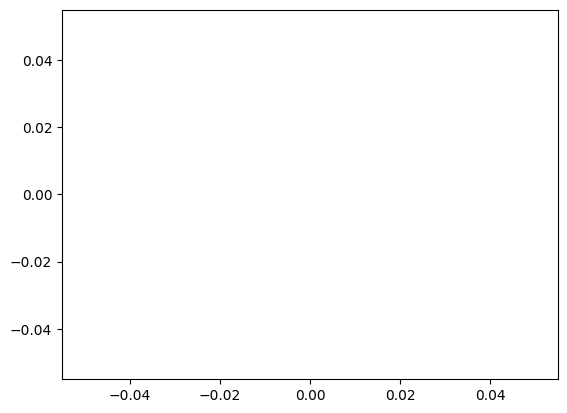

In [57]:
# task 1: an empty plot is created and displayed with both axes centered around 0
plt.plot()

In [58]:
# task 2: the lengths are binned from 0 to max(lengths)
length_counts = np.bincount(lengths)
length_counts

array([ 0,  1,  0,  1,  1,  4, 15, 21, 26, 13,  9,  4,  1,  2])

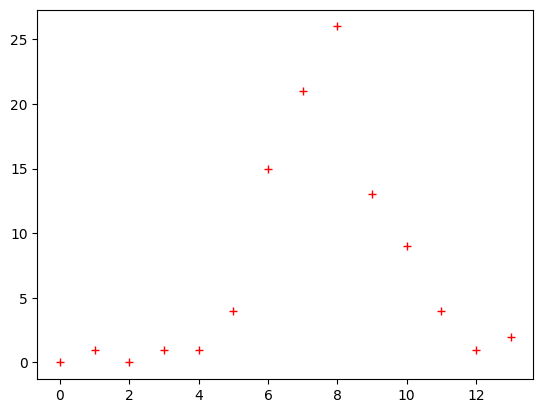

In [59]:
# task 3: use red pluses to plot the length distribution
plt.plot(length_counts, "r+")

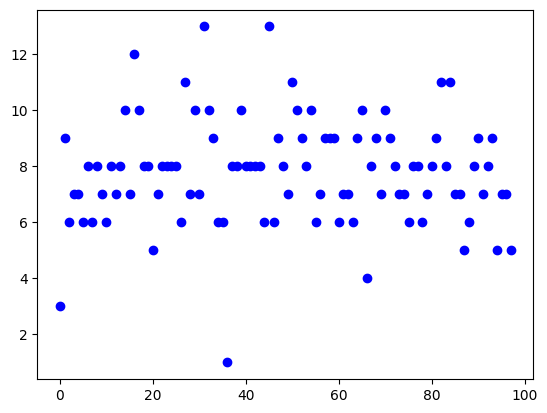

In [60]:
# task 4: by default the x-values will go from 0 to len(y) - 1, this just happens to be correct for the result of np.bincount()
# if you just plot the lengths, the x-axis will go from 0 to 96/97
plt.plot(lengths, "bo")

## 2.9 Improving the first plot
If you want to display the length distribution of the passwords, a histogram would be much better suited than the simple plot from the [previous exercise](#2.8-A-simple-plot). In matplotlib you can do this with the function `plt.bar()`. Compared to `plt.plot()` this function requires both the x-values and the y-data (height) to display anything.

You can use the function `np.arange()` to generate the x-values for the histogram. This function has essentially the same signature as the built-in function `range()`. You will get an array with integer values from the `start` (defaults to 0) to `stop - 1`.
```python
np.arange(4) -> np.array([0, 1, 2, 3])
```

1. Look at the docstring or the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) of the function `plt.bar()`. Can you understand that both the x-values and the y-data (called height) are required?
2. Get the length distribution data without leading zeros. Try to find a general solution that works for any array of password lengths.
3. Generate an array with the x-values to accompany the histogram data. Make sure that the array has the same shape as the y-data.
4. Create a bar plot using the x-values and the filtered histogram data from task 2.
5. Add axis labels with the functions `plt.xlabel("x")` and `plt.ylabel("y")`, and add a title with the function `plt.title("title")`.
6. Change one property of the bars to further improve the plot (based on your personal preference). You can pick something from the docstring of `plt.bar()` or you can find something else online.

In [61]:
# task 1: according to the function signature both x and height are required
plt.bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

In [62]:
# task 2: slice the array returned by np.bincount() with the minimum length
length_counts = np.bincount(lengths)[np.min(lengths):]
length_counts

array([ 1,  0,  1,  1,  4, 15, 21, 26, 13,  9,  4,  1,  2])

In [63]:
# get the range from the minimum and maximum lengths
x = np.array(range(np.min(lengths), np.max(lengths)+1))
x = np.arange(np.min(lengths), np.max(lengths)+1)

In [64]:
# check that the two arrays have the same shapes
length_counts, x

(array([ 1,  0,  1,  1,  4, 15, 21, 26, 13,  9,  4,  1,  2]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

Text(0.5, 1.0, 'Length distribution of 98 passwords')

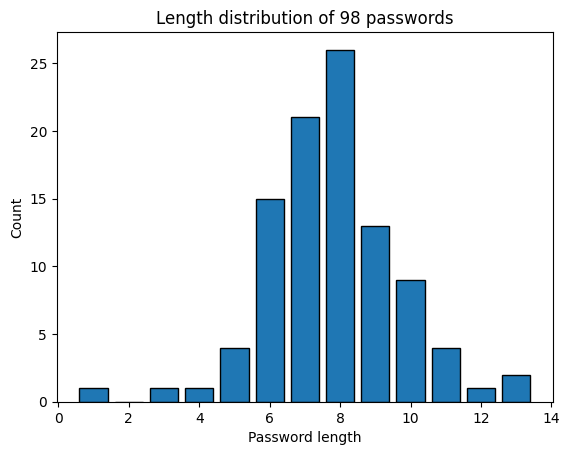

In [65]:
# task 4 - 6: plot the length distribution as bars with black edges
plt.bar(x, length_counts, edgecolor="k")
# label the x-axis and the y-axis with a string
plt.xlabel("Password length")
plt.ylabel("Count")
# set the title to a string
plt.title("Length distribution of 98 passwords")

## 2.10 Readable and reusable code with functions
So far you have directly written and executed your code in the cells, which is one of the big advantages of the Jupyter environment. This was a perfectly fine approach since most of the tasks required just a few lines of code and you never had to use more than one for-loop. Wrapping a task in a function makes sense as soon you have to repeat the task many times.

If you want to compute the digit sum of a password, there is no function available in native Python or NumPy. You have to iterate over the characters in the password, filter out the numeric characters and convert them to integers before finally summing them up. Implementing the computation of the digit sum in a function will therefore make your code a lot more readable and reusable since you just have to call `compute_digit_sum(password)` for every password in the dataset. You can use the following template to write your own function for the computation of the sum of digits:
```python
def compute_digit_sum(password):
    digit_sum = 
    
    return digit_sum
```
The parameter is called `password` and it is only defined in the scope of the function (indicated by the indentation). The keyword `return` is followed by the computed digit sum that you want to return from the function.

1. Recall how the computation of the digit sum worked. You can either copy the cell from the previous notebook or you can rewrite the computation.
2. Implement the computation as a function. You can use the template above or you can write the function from scratch.
3. Compute the digit sums for all the passwords and store the result in a NumPy array. You can store it in a list first, but the final result must be a NumPy array.
4. Display the digit sums in a new plot and decide what data to use for the x-values. Label the axes, give the plot a title and modify a few plot properties to your liking.
5. EXTRA: Try to write the computation of the digit sums for all passwords without a function. Do you agree that using the function increases the readability?

In [66]:
# task 1: computation of the digit sum with a list comprehension
password = "123456"
sum([int(c) for c in password if c.isnumeric()])

21

In [67]:
# task 2: function implementation with a regular for-loop
def compute_digit_sum(password):
    digit_sum = 0
    for char in password:
        if char.isnumeric():
            digit_sum += int(char)
    return digit_sum

In [68]:
# task 2: the function implementation with a list comprehension allows you to directly return the result
def compute_digit_sum(password):
    return sum([int(c) for c in password if c.isnumeric()])

In [69]:
# task 3: start from an empty list and iterate over the passwords to append the digit sums
digit_sums = []
for password in passwords:
    digit_sums.append(compute_digit_sum(password))
digit_sums = np.array(digit_sums)

In [70]:
# task 3: use a list comprehesion and directly pass the list to an array
digit_sums = np.array([compute_digit_sum(password) for password in passwords])

Text(0.5, 1.0, 'Computation of the digit sum of 98 passwords')

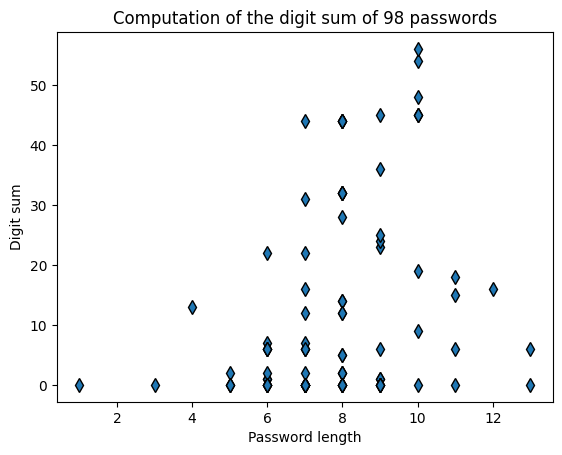

In [71]:
# task 4: plot the digit sum as a function of the length, use diamond-shaped markers with a black edge
plt.plot(lengths, digit_sums, "d", markersize=7, markeredgewidth=1, markeredgecolor="k")
# label the two axes based on the data
plt.xlabel("Password length")
plt.ylabel("Digit sum")
# describe the plot in the title
plt.title("Computation of the digit sum of 98 passwords")

In [72]:
# task 5: compute the digit sums without a function using regular for loops
digit_sums = []
for password in passwords:
    digit_sum = 0
    for c in password:
        if c.isnumeric():
            digit_sum += int(c)
    digit_sums.append(digit_sum)
np.array(digit_sums)

array([ 0, 23,  6,  6,  0,  1,  0,  7, 32,  6,  1,  2,  7, 14,  0, 12, 16,
       45,  2, 44,  2, 44, 44, 44, 44, 44,  6, 15,  0, 45, 22,  6, 48,  1,
        6,  0,  0, 28,  0, 54, 32, 32, 32, 32,  0,  0, 22,  6, 14,  6,  6,
       45,  1,  2, 19,  6,  0, 45, 24, 36,  0, 31, 16,  0,  0,  9, 13,  0,
        0,  0, 56,  0,  5,  0,  0,  0,  5,  0,  2,  0,  0,  0, 18,  0,  0,
        0,  2,  0,  0, 12,  0,  0, 12, 25,  0,  0,  0,  0])

In [73]:
# task 5: compute the digit sums without a function using nested list comprehensions
np.array([sum([int(c) for c in password if c.isnumeric()]) for password in passwords])

array([ 0, 23,  6,  6,  0,  1,  0,  7, 32,  6,  1,  2,  7, 14,  0, 12, 16,
       45,  2, 44,  2, 44, 44, 44, 44, 44,  6, 15,  0, 45, 22,  6, 48,  1,
        6,  0,  0, 28,  0, 54, 32, 32, 32, 32,  0,  0, 22,  6, 14,  6,  6,
       45,  1,  2, 19,  6,  0, 45, 24, 36,  0, 31, 16,  0,  0,  9, 13,  0,
        0,  0, 56,  0,  5,  0,  0,  0,  5,  0,  2,  0,  0,  0, 18,  0,  0,
        0,  2,  0,  0, 12,  0,  0, 12, 25,  0,  0,  0,  0])

## 2.11 Labeling data in plots
When you have multiple lines and/or markers in a single plot, you want to label the data and display the labels in a legend. In matplotlib all the plot functions such as `plt.plot()`, `plt.bar()` etc. have the optional string parameter `label` that allows you to label the data. You can then add a legend to the plot where the markers/lines will be displayed next to their labels. See the following code snippet that creates a simple line plot with a label and a legend:
```python
plt.plot(-np.arange(10) / 2, "r-", label="something linear")
plt.legend()
```
All labels that are assigned in the same cell before calling `plt.legend()` will be included in the legend. You should therefore call `plt.legend()` at tne end of a cell. If you want to exclude something from the legend, just omit the parameter `label` for that function.

To include some "dynamic" information about the dataset in a label or a title, you can use string formatting to include variables in a string. The recommended way is to use so-called f-strings where the variables are just written directly in the string. As an example, consider a plot where the length distribution of the passwords with a digit sum lower than the value of the variable `max_digit_sum` is shown. You can then use the variable `max_digit_sum` to create the following title:
```python
plt.title(f"Length distribution of passwords with a digit sum lower than {max_digit_sum}")
```

1. Create an f-string that presents a password from the dataset including all the properties of the password that you have computed in this notebook.
2. Plot the digit sums as a function of the password length and label the axes accordingly. Use a reasonable format to display the data.
3. Compute the maximum possible digit sum as a function of the password length and include this in the plot by calling `plt.plot()` for a second time.
4. Assign labels to all the data with the `label` parameter and add a legend to the plot. How can you change the position of the legend in the plot?
5. Add a title to the plot that includes the number of passwords in the dataset using an f-string

In [74]:
# task 1: define an index to select a passowrd and read the corresponding length and digit sum
i = 27
f"The password '{passwords[i]}' has the length {lengths[i]} and the digit sum {digit_sums[i]}"

"The password 'qwerty12345' has the length 11 and the digit sum 15"

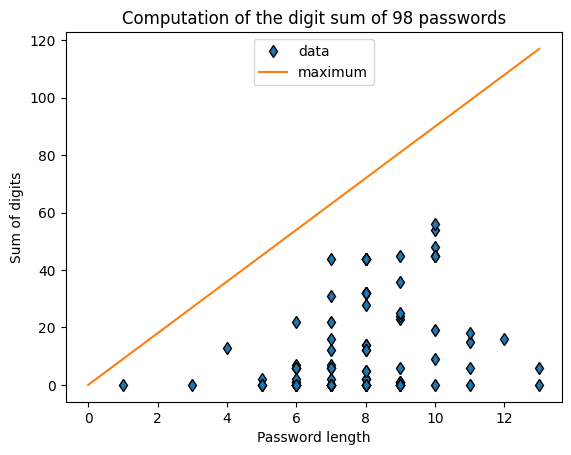

In [75]:
# task 2 - 5: plot the digit_sums as a function of the lengths with diamond markers with a black edge, the label is just "data"
plt.plot(lengths, digit_sums, "d", markeredgewidth=1, markeredgecolor="k", label="data")
# plot the maximum possible digit sum as a function of the length with the label "maximum", the x-values are automatically correct
plt.plot(9*np.arange(np.max(lengths) + 1), label="maximum")
# assign the usual labels to the axes
plt.xlabel("Password length")
plt.ylabel("Sum of digits")
# include the number of passwords in the dataset in the title
plt.title(f"Computation of the digit sum of {len(passwords)} passwords")
# display the legend in the upper center of the plot
plt.legend(loc="upper center")

## 2.12 Counting characters
In this exercise you are going to count the characters of all passwords you have read from the file in a single dictionary. As a reminder, the count of a character tells you how often this character appeared in the passwords of your dataset.
```python
["abc", "dac", "bba"] -> {"a": 3, "b": 3, "c": 2, "d": 1}
```

1. Write a function that accepts a password as an argument and returns a dictionary with the character counts.
2. Copy the function from task 1 and change it to accept a dictionary as a second argument. Modify the existing dictionary in the function and do not return it.
3. Use the function from task 2 to get the character counts of the entire dataset.
4. EXTRA: Use the function from task 1 and "merge" the individual dictionaries from the dataset. Check that the resulting dictionary is equal to the one from task 3.
5. Display the character counts in a bar plot. Label the axes and use an f-string that includes the length of the dataset in title.
6. Create three new dictionaries to separate the counts of the alphabetic characters, the numeric characters and the special characters. Create a bar plot for each one and label it accordingly.

In [76]:
# task 1: the function always starts with an empty dictionary
def count_characters_task1(password):
    character_count = {}
    for char in password:
        if char in character_count:
            character_count[char] += 1
        else:
            character_count[char] = 1
    return character_count

i = 26
passwords[i], count_characters_task1(passwords[i])

('123rrr', {'1': 1, '2': 1, '3': 1, 'r': 3})

In [77]:
# task 2: the function modifies the "global" dictionary
def count_characters_task2(password, character_count):
    for char in password:
        if char in character_count:
            character_count[char] += 1
        else:
            character_count[char] = 1

i = 26
character_count = {}
count_characters_task2(passwords[i], character_count)
passwords[i], character_count

('123rrr', {'1': 1, '2': 1, '3': 1, 'r': 3})

In [78]:
# task 3: start with an empty dictionary and just iterate over the passwords
character_count = {}
for password in passwords:
    count_characters_task2(password, character_count)

# compute the total number of characters to check for errors
sum(character_count.values())

762

In [79]:
# task 4: this is essentially just a reimplementation of the functions from task 1 and 2
character_count = {}
for password in passwords:
    for char, count in count_characters_task1(password).items():
        # instead of incrementing by 1 or starting at 1 the "count" is used
        if char in character_count:
            character_count[char] += count
        else:
            character_count[char] = count

sum(character_count.values())

762

Text(0.5, 1.0, 'Character counts of 98 passwords')

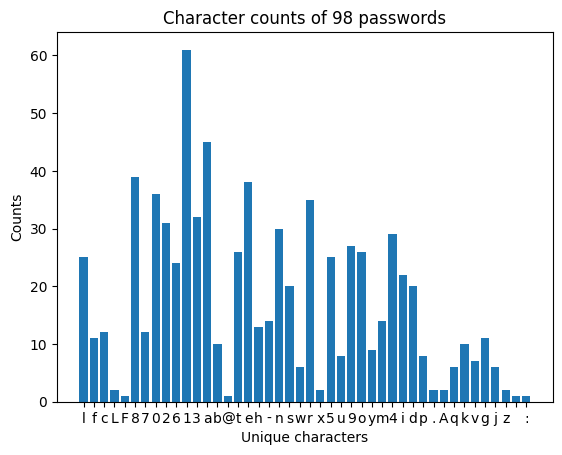

In [80]:
# task 5: use the keys as the x-data and the values as the y-data
plt.bar(character_count.keys(), character_count.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Character counts of {len(passwords)} passwords")

In [81]:
# task 6: create three empty dictionaries
alphabetic_count = {}
numeric_count = {}
special_count = {}

# iterate over the character_count items
for char, count in character_count.items():
    # run the categorization on the keys and assign the key-value pairs to the respective dictionaries
    if char.isalpha():
        alphabetic_count[char] = count
    elif char.isnumeric():
        numeric_count[char] = count
    else:
        special_count[char] = count

Text(0.5, 1.0, 'Alphabetic character counts of 98 passwords')

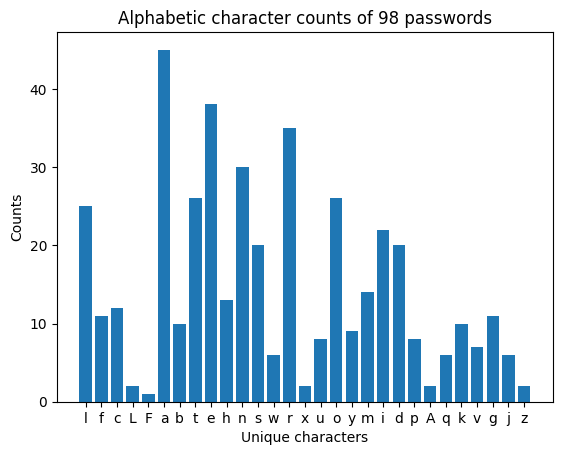

In [82]:
# task 6
plt.bar(alphabetic_count.keys(), alphabetic_count.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Alphabetic character counts of {len(passwords)} passwords")

Text(0.5, 1.0, 'Numeric character counts of 98 passwords')

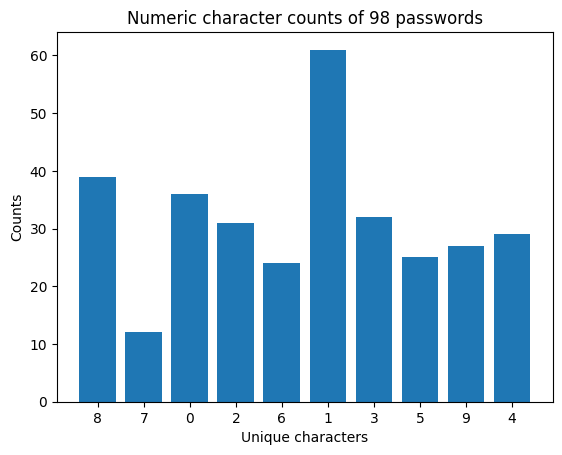

In [83]:
# task 6
plt.bar(numeric_count.keys(), numeric_count.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Numeric character counts of {len(passwords)} passwords")

Text(0.5, 1.0, 'Special character counts of 98 passwords')

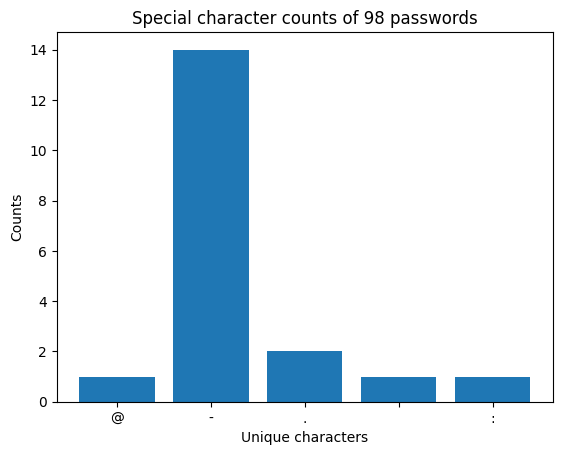

In [84]:
# task 6
plt.bar(special_count.keys(), special_count.values())
plt.xlabel("Unique characters")
plt.ylabel("Counts")
plt.title(f"Special character counts of {len(passwords)} passwords")

## EXTRA: Sorting the character counts
The plots in the previous exercise look a bit messy since the character count data is not ordered in any reasonable way. Due to the iteration over the passwords and the characters, the characters are currently just ordered by their first occurrence in the password dataset. For all three categories it would be nice to sort the values in descending order such that the characters are ordered by their frequencies from left to right in the plot. Alternatively, you could also sort the alphabetic data by the keys in alphabetic order (meaning "A" to "Z"), and you could sort the numeric data by the keys in numeric order (meaning "0" to "9").  

There are two options to approach the sorting. You can either use the native Python function `sorted()` or you can make use of the NumPy package and the functions `np.sort()` and `np.argsort()`. If you want to try the former option, read the section on using the `key` parameter in the `sorted()` function [here](https://realpython.com/sort-python-dictionary/#using-the-key-parameter-and-lambda-functions). If you want to use the NumPy approach, just read the remaining instructions in this exercise.  

Even though NumPy is optimized for numerical data, the sorting functions also work for string data. If you sort an array of strings, it is ordered alphabetically from "A" to "Z" based on the first character in each string. Even though this might sound a bit complicated, this approach is used whenever strings have to be sorted, for example books in a library. The catch here is that you have to sort the keys together with the values, but to use the NumPy functions you need to separate the keys and values into two arrays. Note that you cannot directly create arrays from the dictionary keys and dictionary values, you have to pass them to the built-in function `list()` before turning them into an array.
```python
keys = np.array(list(alphabetic_counts.keys()))
values = np.array(list(alphabetic_counts.values()))
```
This will convert the keys and values to NumPy data types. While this might look a bit odd when printing the arrays/dictionaries, this is not an issue for any further analysis or plotting. You can call `np.array()` with the argument `dtype=object` to conserve the native data types.

The function `np.sort()` can sort the arrays individually but if you want to keep the arrays aligned during the sorting, you have to use the function `np.argsort()`. Instead of the sorted array, this function will return indices that you can use to sort both arrays (the keys and the values).

1. Write a function that accepts a dictionary and returns a new dictionary that is sorted by the keys. Use your preferred approach to do the sorting.
2. Continue with the function from task 1. Add a string parameter `by` that decides whether the dictionary is sorted by the `"keys"` or by the `"values"`. Also add a boolean parameter `ascending` that decides the order of the sorting. 
3. Start with the alphabetic character counts (you can use the dictionaries from the [previous exercise](#2.12-Counting-characters)). Sort the dictionary by the keys/values in descending/ascending order and display it in a bar plot. Don't forget to add axis labels and a title! Which sorting option (`by` and `ascending`) is your favorite one?
4. Also display the numeric character counts. Reconsider which (sorting) key and order are most suitable to display the data.
5. Display all three categories (alphabetic, numeric and special) in one plot. Call the function `plt.bar()` individually for each category to automatically get the bars in different colors. Label the data and add a legend to the plot.

In [85]:
# task 1: native approach with sorted()
def sort_dict_by_keys_native(d):
    return dict(sorted(d.items()))

# check the sorting with the character count from the previous exercise
print(sort_dict_by_keys_native(character_count))

{' ': 1, '-': 14, '.': 2, '0': 36, '1': 61, '2': 31, '3': 32, '4': 29, '5': 25, '6': 24, '7': 12, '8': 39, '9': 27, ':': 1, '@': 1, 'A': 2, 'F': 1, 'L': 2, 'a': 45, 'b': 10, 'c': 12, 'd': 20, 'e': 38, 'f': 11, 'g': 11, 'h': 13, 'i': 22, 'j': 6, 'k': 10, 'l': 25, 'm': 14, 'n': 30, 'o': 26, 'p': 8, 'q': 6, 'r': 35, 's': 20, 't': 26, 'u': 8, 'v': 7, 'w': 6, 'x': 2, 'y': 9, 'z': 2}


In [86]:
# task 1: NumPy approach with np.argsort()
def sort_dict_by_keys_numpy(d):
    # use the argument dtype=object to conserve the native data types
    keys = np.array(list(d.keys()))
    values = np.array(list(d.values()))
    indices = np.argsort(keys)
    # use the function zip() to create key-value tuples
    return dict(zip(keys[indices], values[indices]))

print(sort_dict_by_keys_numpy(character_count))

{np.str_(' '): np.int64(1), np.str_('-'): np.int64(14), np.str_('.'): np.int64(2), np.str_('0'): np.int64(36), np.str_('1'): np.int64(61), np.str_('2'): np.int64(31), np.str_('3'): np.int64(32), np.str_('4'): np.int64(29), np.str_('5'): np.int64(25), np.str_('6'): np.int64(24), np.str_('7'): np.int64(12), np.str_('8'): np.int64(39), np.str_('9'): np.int64(27), np.str_(':'): np.int64(1), np.str_('@'): np.int64(1), np.str_('A'): np.int64(2), np.str_('F'): np.int64(1), np.str_('L'): np.int64(2), np.str_('a'): np.int64(45), np.str_('b'): np.int64(10), np.str_('c'): np.int64(12), np.str_('d'): np.int64(20), np.str_('e'): np.int64(38), np.str_('f'): np.int64(11), np.str_('g'): np.int64(11), np.str_('h'): np.int64(13), np.str_('i'): np.int64(22), np.str_('j'): np.int64(6), np.str_('k'): np.int64(10), np.str_('l'): np.int64(25), np.str_('m'): np.int64(14), np.str_('n'): np.int64(30), np.str_('o'): np.int64(26), np.str_('p'): np.int64(8), np.str_('q'): np.int64(6), np.str_('r'): np.int64(35), n

In [87]:
# task 2: native approach with sorted()
def sort_dict_native(d, by, ascending):
    # modify the key based on the value of "by"
    key = None if by == "keys" else lambda item: item[1]
    # use the parameter "reverse" to change the order of the items
    return dict(sorted(d.items(), key=key, reverse=not ascending))

# using named arguments can improve the readability
print(sort_dict_native(character_count, by="values", ascending=False))

{'1': 61, 'a': 45, '8': 39, 'e': 38, '0': 36, 'r': 35, '3': 32, '2': 31, 'n': 30, '4': 29, '9': 27, 't': 26, 'o': 26, 'l': 25, '5': 25, '6': 24, 'i': 22, 's': 20, 'd': 20, '-': 14, 'm': 14, 'h': 13, 'c': 12, '7': 12, 'f': 11, 'g': 11, 'b': 10, 'k': 10, 'y': 9, 'u': 8, 'p': 8, 'v': 7, 'w': 6, 'q': 6, 'j': 6, 'L': 2, 'x': 2, '.': 2, 'A': 2, 'z': 2, 'F': 1, '@': 1, ' ': 1, ':': 1}


In [88]:
# task 2: NumPy approach with np.argsort()
def sort_dict_numpy(d, by, ascending):
    # use the argument dtype=object to conserve the native data types
    keys = np.array(list(d.keys()))
    values = np.array(list(d.values()))
    # select the array to use for the sorting
    indices = np.argsort(keys) if by == "keys" else np.argsort(values)
    # reverse the indices if "ascending" is False
    if not ascending:
        indices = indices[::-1]
    return dict(zip(keys[indices], values[indices]))

# using named arguments can improve the readability
print(sort_dict_numpy(character_count, by="values", ascending=False))

{np.str_('1'): np.int64(61), np.str_('a'): np.int64(45), np.str_('8'): np.int64(39), np.str_('e'): np.int64(38), np.str_('0'): np.int64(36), np.str_('r'): np.int64(35), np.str_('3'): np.int64(32), np.str_('2'): np.int64(31), np.str_('n'): np.int64(30), np.str_('4'): np.int64(29), np.str_('9'): np.int64(27), np.str_('t'): np.int64(26), np.str_('o'): np.int64(26), np.str_('l'): np.int64(25), np.str_('5'): np.int64(25), np.str_('6'): np.int64(24), np.str_('i'): np.int64(22), np.str_('s'): np.int64(20), np.str_('d'): np.int64(20), np.str_('-'): np.int64(14), np.str_('m'): np.int64(14), np.str_('h'): np.int64(13), np.str_('c'): np.int64(12), np.str_('7'): np.int64(12), np.str_('g'): np.int64(11), np.str_('f'): np.int64(11), np.str_('b'): np.int64(10), np.str_('k'): np.int64(10), np.str_('y'): np.int64(9), np.str_('p'): np.int64(8), np.str_('u'): np.int64(8), np.str_('v'): np.int64(7), np.str_('q'): np.int64(6), np.str_('j'): np.int64(6), np.str_('w'): np.int64(6), np.str_('z'): np.int64(2),

Text(0.5, 1.0, 'Alphabetic character counts sorted by the "values" in descending order')

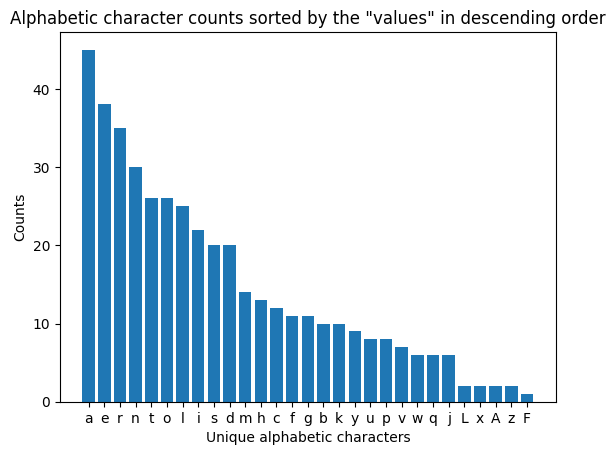

In [89]:
# task 3: display the sorted alphabetic counts
by = "values"
ascending = False
d = sort_dict_native(alphabetic_count, by=by, ascending=ascending)

plt.bar(d.keys(), d.values())
plt.ylabel("Counts")
plt.xlabel("Unique alphabetic characters")
plt.title(f"Alphabetic character counts sorted by the \"{by}\" in {"ascending" if ascending else "descending"} order")

Text(0.5, 1.0, 'Numeric character counts sorted by the "keys" in ascending order')

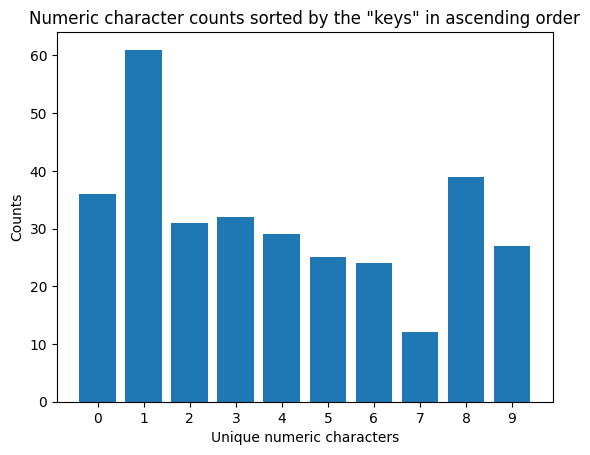

In [90]:
# task 4: display the sorted numeric counts
by = "keys"
ascending = True
d = sort_dict_native(numeric_count, by=by, ascending=ascending)

plt.bar(d.keys(), d.values())
plt.ylabel("Counts")
plt.xlabel("Unique numeric characters")
plt.title(f"Numeric character counts sorted by the \"{by}\" in {"ascending" if ascending else "descending"} order")

Text(0.5, 1.0, 'Categorized character counts sorted by the "values" in descending order')

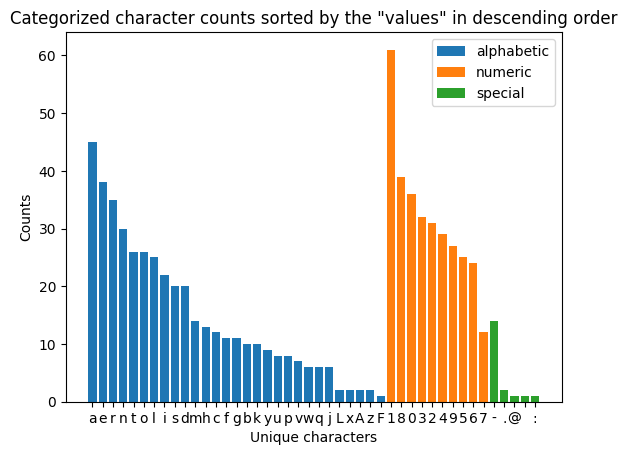

In [91]:
# task 5: display all character counts in a single plot
by = "values"
ascending = False
# use the same "by" and "ascending" for all categories
alphabetic_sorted = sort_dict_native(alphabetic_count, by=by, ascending=ascending)
numeric_sorted = sort_dict_native(numeric_count, by=by, ascending=ascending)
special_sorted = sort_dict_native(special_count, by=by, ascending=ascending)

# add labels to the bar plots to add a legend later
plt.bar(alphabetic_sorted.keys(), alphabetic_sorted.values(), label="alphabetic")
plt.bar(numeric_sorted.keys(), numeric_sorted.values(), label="numeric")
plt.bar(special_sorted.keys(), special_sorted.values(), label="special")
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Unique characters")
plt.title(f"Categorized character counts sorted by the \"{by}\" in {"ascending" if ascending else "descending"} order")